<a href="https://colab.research.google.com/github/brunobf09/Fraude_em_Cartoes_de_Credito/blob/main/%5BPROJETO%5D_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecção de Fraudes em Cartões de Crédito**
*by* **Bruno Brasil**

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://image.freepik.com/vetores-gratis/equipe-hacker-rouba-cartao-de-credito-com-conceito-de-moeda-ou-dinheiro-em-especie_101179-1186.jpg" width="60%"></p>

Dentre essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Entendendo os Dados

O conjunto de dados foi coletado e analisado durante uma colaboração de pesquisa da Worldline e do Machine Learning Group da ULB (Université Libre de Bruxelles) sobre mineração de big data e detecção de fraude. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://image.freepik.com/vetores-gratis/cartao-de-banco-de-plastico-microchip-e-homem-com-lupa_335657-331.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud),
é informado que o conjunto de dados é extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total. Também é importante informar, que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

Somente duas variáveis não foram modificadas, *Time* e *Amount*. *Time* contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. *Amount* é a quantia realizada na transação.

Por fim, temos a coluna *Class*, de forma binária, onde o valor "1" representa fraude cometida na operação realizada.

In [ ]:
# Instalando scikit
!pip install -q scikit-plot

# Importar os pacotes necessários
# Bibliotecas Básicas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Outras Bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, RobustScaler
import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")
sns.set_style()





In [ ]:
# importar os dados para um dataframe
df = pd.read_csv("https://www.dropbox.com/s/9u2k6oyxe1kciqd/creditcard.csv?dl=1")

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Objetivos da Análise:

* Ver o resumo estatístico do *dataframe*
* Verificar se há valores ausentes
* Verificar  se há valores duplicados
* Plotar um gráfico de barras (ou *countplot*) para ver o balanceamento do *dataset*
* Verificar distribuição dos dados não padronizados (`Time` e `Amount`)


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()
print("\n Valores Duplicados: ",df.duplicated().tolist().count('True'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


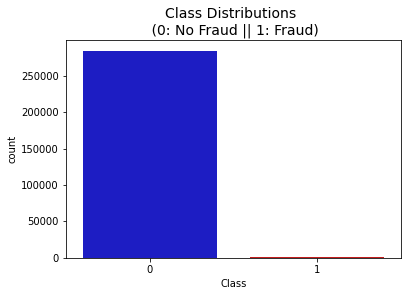

In [ ]:
# Analisando o desbalanceamento dos dados .
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

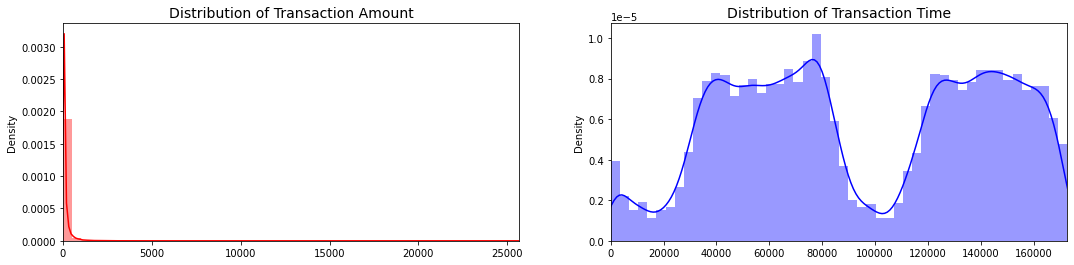

In [ ]:
# Plotando distribuição de Amount e Time
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)]);

Depois de realizado uma breve análise exploratória, pode ser observado que o *dataset* não possuía valores duplicados e nem faltantes.

Como já havia sido informado, o número de fraudes representa uma proporção muito baixa, ou seja, será necessário um equilíbrio dos dados para que o modelo obtenha um resultado relevante. Neste caso a acurácia não terá um valor expressivo, sendo necessárias as análises da Precisão, *Recall* e *F1-score*.

Da distribuição de `Amount` foi verificada uma concentração de transações abaixo de 500, porém nenhum valor será considerado *outlier* para preservar o *dataset*. Assim será feito também com `Time`.



## Preparação dos Dados

Nesta fase serão realizadas as seguintes etapas:
* Normalizar dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Balancear o conjunto de dados (técnica escolhida: *subsample*)
* Verificar se houve mudança na correlação das *features*

In [ ]:
# Normalização de dados com RobustScaler (RobustScaler é menos sujeito a outliers)
rob_scaler = RobustScaler()

df['Scaler_Amount']= rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Scaler_Time']= rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df_clean = df.drop(['Amount','Time'],axis=1)

In [ ]:
# Balanceando Dados

df_clean.sample(frac=1)

fraud_df = df_clean.loc[df['Class'] == 1]
non_fraud_df = df_clean.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Misturando linhas a fim de evitar viés
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Scaler_Amount,Scaler_Time
121,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,-0.291864,0.064800,1.527192,-0.131506,-1.696914,0.482121,0.586418,0.034541,-0.306278,-0.206030,-0.118939,0.052828,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0,-0.179976,-0.994079
248296,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,4.436319,-4.503801,-0.954361,-9.861372,-0.505329,0.269282,0.591319,1.795992,-1.085208,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1,-0.307413,0.812780
239,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,-0.471302,0.029104,0.252013,0.740676,0.588884,0.480297,0.799412,-0.592090,0.032839,-1.012363,-0.799293,-0.119439,0.070051,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0,-0.027947,-0.993104
239501,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,-0.448794,-2.562602,0.243483,-1.181669,0.004373,-2.302596,-4.446192,-1.710463,0.982729,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1,3.007895,0.768888
143336,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,6.348979,-8.681609,0.251179,-11.608002,-0.351569,-5.363566,-11.939092,-3.583603,0.897402,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1,3.226717,0.006967


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


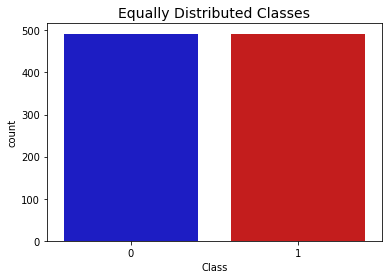

In [ ]:
# Plot dos dados balanceados
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

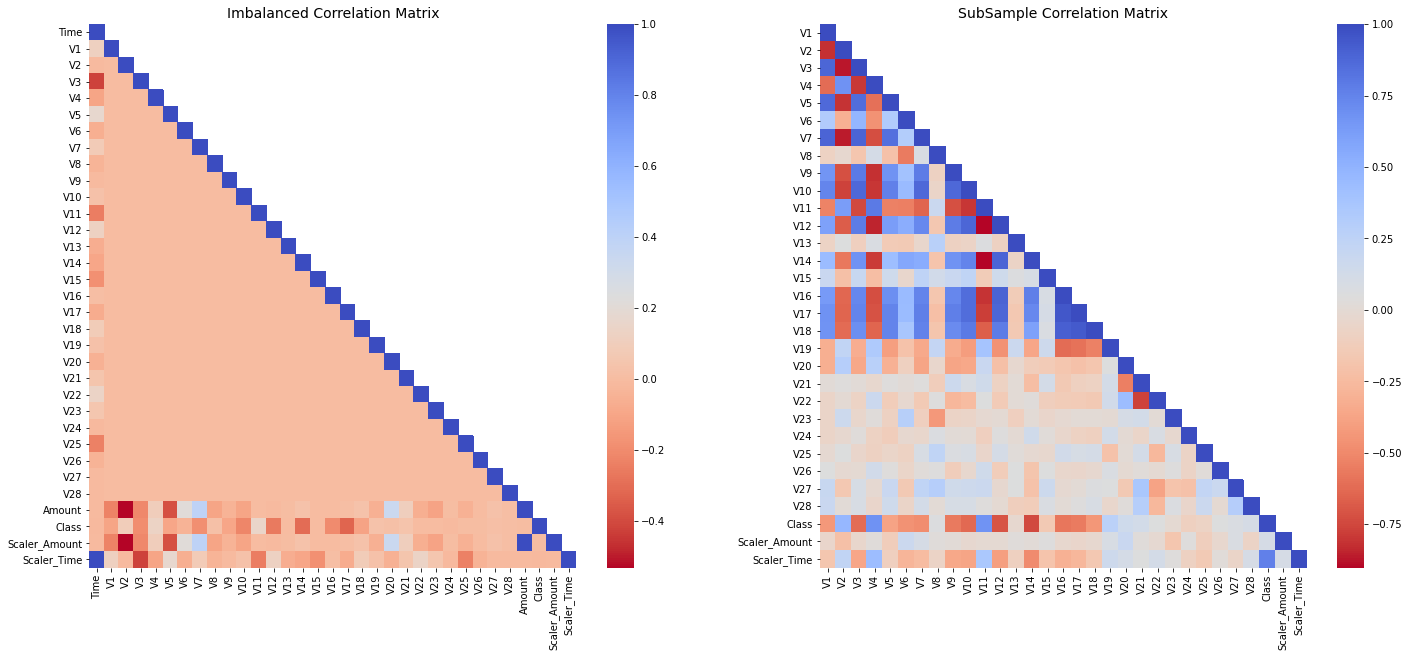

In [ ]:
# Verificando se houve alterção na correlação de dados.

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,10))

def plot_corr(corr,ax):
    # Cortaremos a metade de cima pois é o espelho da outra metade
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True
    sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax, mask=mask)
    

# Antigo DataFrame
corr = df.corr()
plot_corr(corr,ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

# Novo DataFrame
sub_sample_corr = new_df.corr()
plot_corr(sub_sample_corr,ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

Do pré-processamento foi feito a normalização das variáveis `Time` e `Amount`. Além disso, foi utilizada a técnica de *subsample* para balancear os dados, diminuindo a quantidade de transações não fraudadas. Como resultado, percebesse nitidamente a diferença de correlação entre as *features* após a padronização e balanceamento do *dataset*.

## Modelo de Machine Learning

Sabendo que o resultado desejado é binário, "1" para fraude e "0" para não-fraude, o objetivo dessa fase será construir um modelo para **Classificação**, utilizando Regressão Logística.

In [ ]:
# Aplicando Modelo
# 1. escolher e importar um modelo.
from sklearn.linear_model import LogisticRegression

# 2. Instanciar e escolher os hyperparameters.
model = LogisticRegression()

# 3. Separar os dados entre feature matrix e target vector 
X = new_df.drop('Class',axis=1)
y = new_df['Class']

# 5. Dividir o dataset entre treino e teste
X_train,X_test,y_train,y_test = train_test_split(X,y)

# 4. Padronizar treino, se for o caso.
None

# 6. Fit do modelo (treinar modelo)
model.fit(X_train,y_train)

# 7. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)

## Avaliar o desempenho do modelo

Será plotado uma matriz de confusão para análise do Modelo.

Como havia sido dito, a métrica acurácia não é tão relevante porque os dados estavam desbalanceados. O foco será na Precisão, *Recall*, *F1-Score* e *AUC*.


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9225    0.9917    0.9558       120
           1     0.9915    0.9206    0.9547       126

    accuracy                         0.9553       246
   macro avg     0.9570    0.9562    0.9553       246
weighted avg     0.9578    0.9553    0.9553       246

Acurácia: 0.9553

AUC: 0.9562



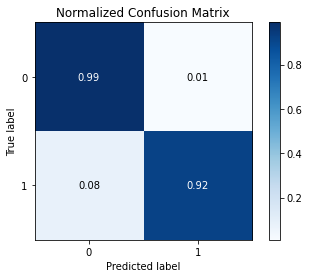

In [ ]:
# Avaliando modelo 
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

## Mais preciso numa avaliação final

Como foi utilizado um balanceamento dos dados, e sua ordem foi alterado aleatoriamente, esse mesmo processo será rodado diversas vezes para identificar se o modelo apresentou um resultado positivo através das escolhas aleatórias para o equilíbrio desejado do *dataset*.

In [ ]:
# Definindo uma função de repetição do processo aplicado acima
FN_percent = []
def FalseNegative(x):
  for i in range(x):
    df_clean.sample(frac=1)
    fraud_df = df_clean.loc[df['Class'] == 1]
    non_fraud_df = df_clean.loc[df['Class'] == 0][:492]
    normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
    new_df = normal_distributed_df.sample(frac=1, random_state=42)
    model = LogisticRegression()
    X = new_df.drop('Class',axis=1)
    y = new_df['Class']
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    percent = FN/(FN+TP)
    FN_percent.append(percent)
  print("Esse modelo foi repetido",i+1,"vezes\nMédia de Falsos Negativos:",round(sum(FN_percent)/len(FN_percent)*100,2),"%")



Esse modelo foi repetido 10 vezes
Média de Falsos Negativos: 2.52 %
Esse modelo foi repetido 100 vezes
Média de Falsos Negativos: 2.52 %
Esse modelo foi repetido 1000 vezes
Média de Falsos Negativos: 2.52 %
Esse modelo foi repetido 10000 vezes
Média de Falsos Negativos: 2.53 %
Maior valor para FN encontrado: 10.53%


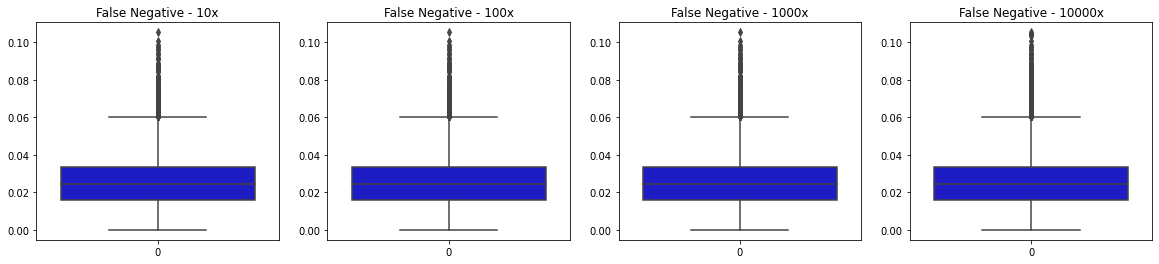

In [ ]:
 # Aplicando a função e verificando a presença de outliers e dispersão de dados
f, axes = plt.subplots(ncols=4, figsize=(20,4))

FalseNegative(10)
a1=FN_percent
sns.boxplot(data=a1, palette=colors, ax=axes[0])
axes[0].set_title('False Negative - 10x')
max1=max(FN_percent)

FalseNegative(100)
a2=FN_percent
sns.boxplot(data=a2, palette=colors, ax=axes[1])
axes[1].set_title('False Negative - 100x')
max2=max(FN_percent)

FalseNegative(1000)
a3=FN_percent
sns.boxplot(data=a3, palette=colors, ax=axes[2])
axes[2].set_title('False Negative - 1000x')
max3=max(FN_percent)

FalseNegative(10000)
a4=FN_percent
sns.boxplot(data=a4, palette=colors, ax=axes[3])
axes[3].set_title('False Negative - 10000x')
max4=max(FN_percent)

print('Maior valor para FN encontrado:',str(round(max(max1,max2,max3,max4)*100,2))+'%')
plt.show()

Como pode ser observado, a média se manteve próxima de 2.52%, uma mediana que também não demonstrou alteração e a presença de *outliers*. Como o objetivo é ser conservador, verificamos que o maior valor para Falsos Negativos foi de 10.53%, após o mesmo processo ter sido rodado 11110 vezes.

## Conclusão

Por fim, utilizamos um modelo de **Classificação** através da Regressão Logística, foram evitadas exclusões de *features* e *outliers* devido o sigilo dos dados, que no final apresentou bons resultados. Foram eles:

* Precisão: 99%
* *Recall*: 92%
* *F1-Score*: 95%
* Acurácia: 96%
* AUC: 96%

A precisão representa que entre todas as classificações de classe positivo que o modelo fez, 99% delas estavam corretas. 

Do Recall, dentre todas as situações de classe positivo como valor esperado, 92% estão corretas e o F1-Score seria a média harmônica entre precisão e recall. 
Todos essas formas de avaliação apresentaram bons resultados, sendo resumida pela acurácia de 96%, lembrando que como os dados foram balanceados, vamos focar nas outras medidas. 

Por último a AUC (Area Under the ROC Curve) de 96%, que mede a qualidade das previsões do modelo.

Dessas medidas, considero a mais importe o Recall, pois ele é usado em situações em que os falsos negativos são considerados mais prejudiciais que os falsos positivos. Neste caso, um falso negativo representa o prejuízo das instituições financeiras.

Como o nosso modelo prevê um falso negativo máximo de aproximadamente 10,53%, considerando a hipótese, conforme o estudo deste caso, de que ocorram aproximadamente 492 casos em dois dias, seriam evitados aproximadamente 80.141 casos de fraude de cartão de crédito no período de um ano.